In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

In [3]:
seed_set_files = ["GDPR_Seeds_Ethnicity_wFTembs_newCC.csv",
                  "GDPR_SeedsSexLife_wFTembs_newCC.csv",
                  "GDPR_SeedsReligion_wFTembs_newCC.csv",
                  "GDPR_SeedsPoliticsTradeUnion_wFTembs_newCC.csv"]

In [4]:
dat_seeds = pd.concat([pd.read_csv(f) for f in seed_set_files], axis=0)

In [11]:
dat_seeds

,Category,Term,Term_proc,embfull_dim0,embfull_dim1,embfull_dim2,embfull_dim3,embfull_dim4,embfull_dim5,embfull_dim6,...,embfull_dim290,embfull_dim291,embfull_dim292,embfull_dim293,embfull_dim294,embfull_dim295,embfull_dim296,embfull_dim297,embfull_dim298,embfull_dim299
0,Ethnic Origin,BAME,['BAME'],-0.066361,-0.069315,-0.096008,-0.031866,0.084726,0.064622,-0.034412,...,-0.124228,0.058517,0.034720,0.070206,-0.060798,-0.045003,0.204386,0.248836,-0.079341,0.045825
1,Ethnic Origin,EHRC,['EHRC'],-0.004182,0.011375,0.027446,-0.024882,0.004718,-0.166413,-0.032475,...,0.084051,-0.111147,-0.076934,-0.079878,-0.091956,-0.323181,0.204883,0.223683,0.094065,0.046056
2,Ethnic Origin,aboriginal,['aboriginal'],0.024154,0.000544,-0.002871,0.036950,0.005086,-0.066633,0.012755,...,-0.061855,-0.037380,-0.013445,0.073517,-0.016036,-0.010990,0.061081,0.068480,0.019121,0.002326
3,Ethnic Origin,african,['african'],0.014776,-0.057755,-0.033325,0.019746,-0.057289,-0.080851,0.072335,...,-0.045166,0.038078,-0.106072,0.127707,0.001679,0.058196,-0.029897,0.102182,-0.076031,0.000260
4,Ethnic Origin,african-american,['african-american'],-0.008708,-0.008182,-0.043906,0.004338,-0.052078,-0.042543,0.015611,...,-0.013187,-0.020233,-0.038052,0.047471,0.004519,0.005469,0.013059,0.031547,-0.024671,0.020190
5,Ethnic Origin,afro-caribbean,['afro-caribbean'],0.004458,-0.020593,-0.014092,0.048757,-0.008888,-0.021743,0.011514,...,-0.009421,0.016702,-0.025613,0.016118,0.011803,0.013249,-0.018799,0.024410,-0.011467,-0.011813
6,Ethnic Origin,arab,['arab'],-0.078738,-0.058888,-0.080957,0.082678,-0.214351,-0.076608,0.076027,...,-0.135141,0.024862,-0.283731,0.171609,-0.094257,-0.076276,-0.091143,0.144953,-0.093329,-0.234043
7,Ethnic Origin,asian,['asian'],0.075160,-0.067384,0.010598,0.048220,-0.041467,-0.120231,0.031253,...,-0.060533,0.033594,-0.080088,0.172427,0.052696,0.064921,0.044141,0.155579,-0.074518,-0.050141
8,Ethnic Origin,bangladeshi,['bangladeshi'],-0.019222,-0.001357,0.004061,-0.000002,-0.048182,-0.002745,0.030202,...,-0.053442,0.016612,-0.048113,0.069118,-0.042064,0.016758,0.031303,0.045263,-0.023711,-0.039210
9,Ethnic Origin,bigotry,['bigotry'],-0.010373,0.021676,-0.004308,0.022752,-0.124461,-0.122682,0.046937,...,-0.004471,-0.037163,-0.083928,-0.012621,0.051207,-0.066160,0.033133,0.117501,0.033988,0.057434


In [15]:
dat_seeds_dim2  = PCA(n_components=2).fit_transform(dat_seeds.filter(regex="embfull_dim", axis=1))

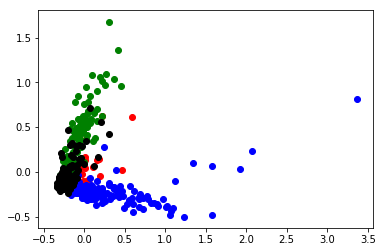

In [16]:
labels = dat_seeds.Category
collist = ['red','blue','green','black']
for label,col in zip(labels.unique(),collist):
    sub = dat_seeds_dim2[(labels==label).values,:]
    plt.scatter(sub[:,0], sub[:,1], color=col)

In [7]:
dat_seeds_dim3_df = pd.DataFrame(PCA(n_components=3).fit_transform(dat_seeds.filter(regex="embfull_dim", axis=1)), columns=["pc1","pc2","pc3"])
dat_seeds_dim3_df['category'] = dat_seeds.Category.values
dat_seeds_dim3_df['term'] = dat_seeds.Term.values
dat_seeds_dim3_df.head()

,pc1,pc2,pc3,category,term
0,0.012837,0.132369,1.287612,Ethnic Origin,BAME
1,-0.055022,0.357424,1.255527,Ethnic Origin,EHRC
2,-0.244350,-0.093441,-0.062694,Ethnic Origin,aboriginal
3,0.107179,0.050999,-0.096084,Ethnic Origin,african
4,-0.177215,-0.067499,-0.085903,Ethnic Origin,african-american


In [5]:
import plotly.express as px
import plotly.graph_objs as go

In [8]:
a = px.colors.qualitative.Dark2+px.colors.qualitative.Dark24+ \
    px.colors.qualitative.Light24+px.colors.qualitative.Vivid
colormap = {cat:a[i] for i,cat in enumerate(dat_seeds_dim3_df.category.unique()) }

In [13]:
def plot3D(df,hover,label):
    fig = px.scatter_3d(df, x='pc1', y='pc2', z='pc3',size=[3]*len(df),size_max=7,hover_name=hover,
                        opacity=0.7,color='category',symbol_sequence=['x']*len(df),color_discrete_map={})
    # tight layout
    fig.update_layout(height=800,
        title_text=label)
    fig.update_layout()
    
    #To open on separate window
    win = PlotlyViewer(fig)
    
    #To open in the notebook
    fig.show()

In [14]:
fig = plot3D(dat_seeds_dim3_df,'term','GDPR Category Seed Words')

In [ ]:
!pip install PyQtWebEngine

In [53]:
#!pip install PyQt5==5.11.3
!pip install PyQt5==5.14.0

    100% |████████████████████████████████| 43.0MB 783kB/s eta 0:00:01    54% |█████████████████▌              | 23.5MB 11.0MB/s eta 0:00:02
  Using cached https://files.pythonhosted.org/packages/92/c8/feea70d54a9c731cccd6e6353ae3ceee2fd25c3948604d32daa68723fc9b/PyQt5_sip-12.7.1-cp35-cp35m-macosx_10_6_intel.whl
mkl-random 1.0.1 requires cython, which is not installed.
jupyterlab-server 1.0.0 has requirement jsonschema>=3.0.1, but you'll have jsonschema 2.6.0 which is incompatible.
  Found existing installation: PyQt5-sip 4.19.19
    Uninstalling PyQt5-sip-4.19.19:
      Successfully uninstalled PyQt5-sip-4.19.19
  Found existing installation: PyQt5 5.11.3
    Uninstalling PyQt5-5.11.3:
      Successfully uninstalled PyQt5-5.11.3
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
#To be able to create plotly graphs on standalone windows
import plotly.graph_objs as go
import plotly.offline
fig = go.Figure()
import os, sys
from PyQt5.QtWidgets import QApplication
from PyQt5.QtCore import QUrl
from PyQt5 import QtWebEngineWidgets


class PlotlyViewer(QtWebEngineWidgets.QWebEngineView):
    def __init__(self, fig, exec=True):
        # Create a QApplication instance or use the existing one if it exists
        self.app = QApplication.instance() if QApplication.instance() else QApplication(sys.argv)

        super().__init__()

        self.file_path = os.path.abspath(os.path.join(os.path.dirname('__file__'), "temp.html"))
        plotly.offline.plot(fig, filename=self.file_path, auto_open=False)
        self.load(QUrl.fromLocalFile(self.file_path))
        self.setWindowTitle("Plotly Viewer")
        self.show()

        if exec:
            self.app.exec_()

    def closeEvent(self, event):
        os.remove(self.file_path)